In [9]:
import pandas as pd
from pathlib import Path
expdir = "/homes_unix/jlegrand/data/Memento/output/prediction"
exppath = Path(expdir) / "k-3_feat-series_experimental-True_atlas-schaefer200_winsize-96_batchsize-512_niter-10_stamp-2024-07-08-11:16"

cv_results = pd.read_csv(Path(exppath) / "cv_results.csv", index_col=0)

In [10]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer__weight_decay,param_optimizer__lr,param_module__num_fc_blocks,param_module__num_conv_blocks,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,34.093387,10.098694,0.520957,0.138190,0.00100,0.00010,1,3,"{'optimizer__weight_decay': 0.001, 'optimizer_...",0.352546,0.329704,0.381436,0.306599,0.317629,0.337583,0.026710,1
3,33.220672,16.177933,0.581592,0.113435,0.00100,0.00010,1,4,"{'optimizer__weight_decay': 0.001, 'optimizer_...",0.340907,0.329621,0.332448,0.330889,0.325880,0.331949,0.004978,2
0,63.994332,9.788968,0.640515,0.148846,0.10000,0.00001,1,4,"{'optimizer__weight_decay': 0.1, 'optimizer__l...",0.341715,0.323537,0.340822,0.316452,0.312649,0.327035,0.012139,3
6,26.256086,10.493550,0.572666,0.148492,0.01000,0.00010,1,2,"{'optimizer__weight_decay': 0.01, 'optimizer__...",0.328137,0.342427,0.335752,0.283805,0.338904,0.325805,0.021523,4
8,29.777127,9.250004,0.642994,0.155794,0.01000,0.01000,3,4,"{'optimizer__weight_decay': 0.01, 'optimizer__...",0.304683,0.322386,0.335651,0.317156,0.314024,0.318780,0.010214,5
2,21.900490,3.372277,0.559134,0.148621,0.00001,0.10000,1,1,"{'optimizer__weight_decay': 1e-05, 'optimizer_...",0.316070,0.322748,0.314686,0.340236,0.274566,0.313661,0.021560,6
7,52.291254,28.266705,0.727508,0.156277,0.01000,0.00001,3,1,"{'optimizer__weight_decay': 0.01, 'optimizer__...",0.356545,0.321608,0.336531,0.194738,0.321606,0.306205,0.057190,7
1,27.599310,10.112907,0.537287,0.068430,0.00010,0.10000,1,1,"{'optimizer__weight_decay': 0.0001, 'optimizer...",0.337779,0.294006,0.254195,0.333697,0.309964,0.305928,0.030398,8
5,23.228651,7.641012,0.529105,0.114783,0.00010,0.10000,1,3,"{'optimizer__weight_decay': 0.0001, 'optimizer...",0.281059,0.280092,0.290077,0.340628,0.316215,0.301614,0.023469,9
4,16.261571,1.624834,0.546282,0.052954,0.01000,0.10000,2,3,"{'optimizer__weight_decay': 0.01, 'optimizer__...",0.182667,0.182829,0.203860,0.162795,0.193453,0.185121,0.013640,10


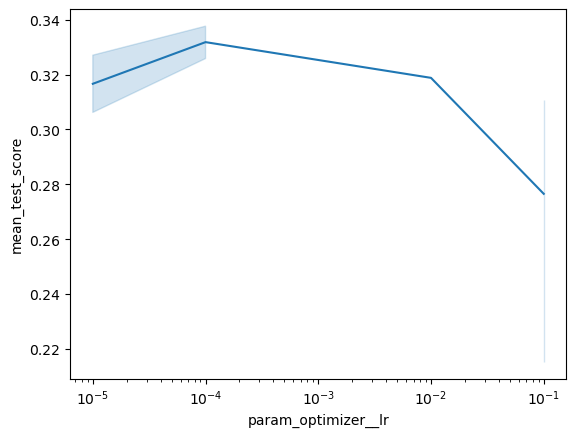

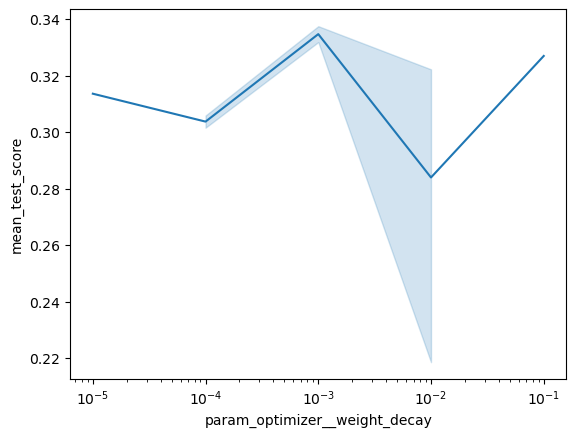

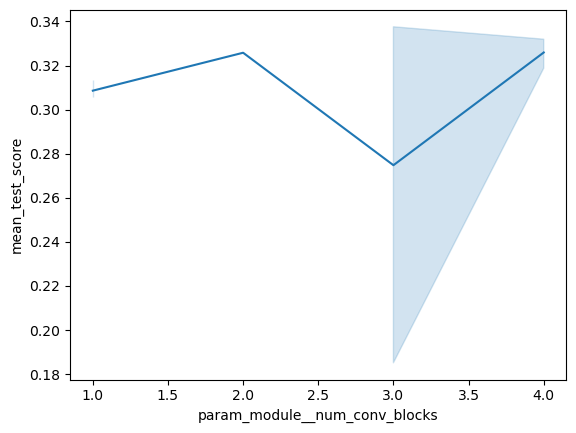

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
#sns.barplot(cv_results, y="param_module__channel_func", x="mean_test_score")
#plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__lr", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__weight_decay", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_module__num_conv_blocks", y="mean_test_score")
plt.show()